# import libraries

In [1]:
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

# data import and information columns

In [2]:
data= pd.read_csv("H:/data/test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


# show ols model 

In [7]:
y1= data['x'].values.reshape(-1,1)
y2 = data['y'].values.reshape(-1,1)
y3 = sm.add_constant(y2)
data = pd.melt(data.reset_index(),id_vars="index",value_vars=['x','y']) 
data.columns = ['id','x','y']

result  = ols("y ~ C(x)",data  = data ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01304
Date:                Sat, 13 Jun 2020   Prob (F-statistic):              0.909
Time:                        19:15:42   Log-Likelihood:                -2866.4
No. Observations:                 600   AIC:                             5737.
Df Residuals:                     598   BIC:                             5746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.9367      1.662     30.645      0.000      47.672      54.201
C(x)[T.y]      0.2684      2.351      0.114      0.909      -4.348       4.885
==============================================================================
Omnibus:                      207.560   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.184
Skew:                          -0.005   Prob(JB):                     2.79e-07
Kurtosis:                       1.901   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# test data 

In [8]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(y1,y2,test_size=25,random_state = 20)



# error plot 

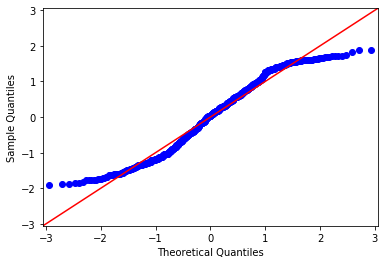

In [9]:
res=result.resid
import statsmodels.api as sm
pp=sm.ProbPlot(res,stats.norm,fit=True)
pp.qqplot(line='45')
plt.show()

# predict model

In [10]:
reg= LinearRegression()

In [11]:
reg.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.coef_

array([[1.01573963]])

In [13]:
reg.intercept_

array([-0.4556628])

In [14]:
# score for test and train data 
reg.score(x_test,y_test)
reg.score(x_train,y_train)

0.9887897931190557

In [15]:
# predict the result 

predict = reg.predict(x_test)


In [16]:
# concat the data predict value and actual value

predict =pd.Series(predict.ravel())
y_test = pd.Series(y_test.ravel())
co  = [predict,y_test]
z = pd.concat(co,axis=1,keys= ['predict','actual'])


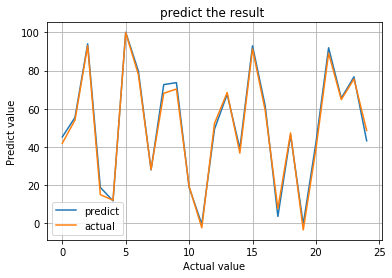

In [17]:
# plot the graph actual and predict value 

z.plot()
plt.grid()
plt.xlabel('Actual value')
plt.ylabel("Predict value")
plt.title("predict the result ")
plt.show()